In [21]:
import keras
import os
from tqdm import tqdm
from mtcnn.mtcnn import MTCNN
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
import cv2
import numpy as np
import dlib

Using TensorFlow backend.


In [24]:
from keras.models import load_model

In [25]:
model = load_model('facenet_keras.h5')

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\bhanu pratap singh\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [26]:
detector = MTCNN()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
def face_detec(filename, flag = 0):
    if flag==0:
        image = Image.open(filename)
        image = image.convert('RGB')
        pixels = np.asarray(image)
    else:
        pixels = filename
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize((160, 160))
    face_array = np.asarray(image)
    return face_array, image

In [11]:
def prepro(face_arr):
    face_arr = face_arr.astype('float32')
    mean, std = face_arr.mean(), face_arr.std()
    face_arr = (face_arr - mean)/std
    face_arri = np.expand_dims(face_arr, axis = 0)
    return face_arri

In [12]:
def face_array(imagepath, flag = 0):
    face_arr, face_image = face_detec(imagepath, flag)
    face_i = prepro(face_arr)
    return face_i, face_image

In [13]:
def face_emb(imagepath, flag = 0):
    face_i, face_img = face_array(imagepath, flag)
    plt.imshow(face_img)
    return model.predict(face_i)

In [14]:
def load_faces(directory, flag = 0):
    faces = list()
    for filename in os.listdir(directory):
        path = directory + filename
        face_arr, face_img  = face_detec(path, flag)
        faces.append(face_arr)
    return faces

In [15]:
def load_dataset(directory, flag = 0):
    x, y = list(), list()
    for subdir in tqdm(os.listdir(directory)):
        path = directory + subdir + '/'
        if not os.path.isdir(path):
            continue
        faces = load_faces(path, flag)

        labels = [subdir for _ in range(len(faces))]

        x.extend(faces)
        y.extend(labels)
    return np.asarray(x), np.asarray(y)


In [16]:
def prepro_Arr(x, flag = 0):
    X = list()
    for fac in x:
        fac = fac.astype('float32')
        mean, std = fac.mean(), fac.std()
        fac = (fac - mean)/std
        face_arri = np.expand_dims(fac, axis = 0)
        X.append(face_arri)
    return X

In [17]:
def face_emb_Arr(X, flag = 0):
    face_i_Arr = list()
    for face_i in X:
        face_i_Arr.append(model.predict(face_i))
    return face_i_Arr

In [18]:
def face_norm(path, flag= 0):
    q = face_emb(path, flag)
    return emb_normalizer.transform(q)

In [19]:
def predictor(img_path, flag =0):
    q = face_norm(img_path, flag)
    z = model_classifier.predict(q)
    return label_encoder.inverse_transform(z)
    return q

In [32]:
image_path = 'H:/python/all1/minor/'

In [33]:
x, y = load_dataset(image_path)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:25<00:00, 13.53s/it]


In [34]:
X = prepro_Arr(x)
X_emb = face_emb_Arr(X)
X_emb_arr = np.array(X_emb)
X_emb_arr = X_emb_arr.reshape(len(X_emb_arr), 128)

emb_normalizer = Normalizer(norm = 'l2')
X_emb_norm_arr = emb_normalizer.transform(X_emb_arr)

In [35]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
Y_labels_enc = label_encoder.transform(y)

In [19]:
model_classifier = SVC(kernel='linear', probability=True)
model_classifier.fit(X_emb_norm_arr, Y_labels_enc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
cap = cv2.VideoCapture(0)
while True:
    r, frame = cap.read()
    #gray_i = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #faces = detector(gray_i)
    #for face in faces:
     #   x1 = face.left()
      #  y1 = face.top()
       # x2 = face.right()
        #y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        
        #landmarks = pred(gray_i, face)

        #for n in range(0, 68):
         #   x = landmarks.part(n).x
          #  y = landmarks.part(n).y
           # cv2.circle(frame, (x, y), 4, (255, 0, 0), -1)

    cv2.imshow("bhanu", frame)
    key = cv2.waitKey(1) & 0xff
    if key==27:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
import pickle

In [38]:
pickle.dump(model_classifier, open('face_reco.pkl', 'wb'))

In [27]:
pickle.dump(model, open('face_mo.pkl','wb'))

In [29]:
pickle.dump(MTCNN, open('face_det.pkl', 'wb'))

In [36]:
pickle.dump(label_encoder, open('face_label.pkl', 'wb'))

In [4]:
mo = pickle.load(open('face_reco.pkl', 'rb'))

In [22]:
mo.predict(predictor(img_path))

NameError: name 'detector' is not defined

In [44]:
pickle.dump(predictor, open('face_C.pkl', 'wb'))

In [2]:
pre = pickle.load(open('face_C.pkl', 'rb'))

AttributeError: Can't get attribute 'predictor' on <module '__main__'>

In [3]:
pre(img_path)

NameError: name 'pre' is not defined

In [20]:
import matplotlib.pyplot as plt

In [ ]:
frame = frame[:,:,::-1]

In [ ]:
img_path = frame

In [8]:
img_path = 'H:/python/all1/testimg.jpg'

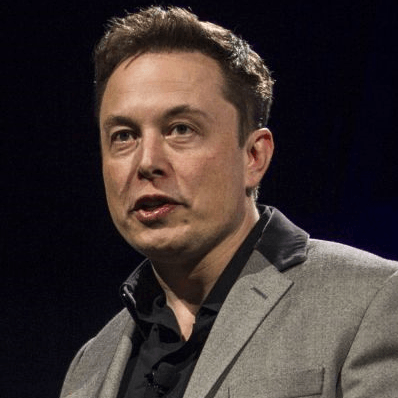

In [39]:
Image.open(img_path)

array(['elonmusk'], dtype='<U18')

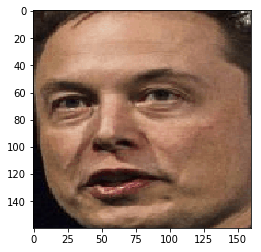

In [34]:
predictor(img_path)